In [1]:
import MyLibrary.phantom as ph
import MyLibrary.RayTransform as RT

import numpy as np
import matplotlib.pyplot as plt

modality  = 'fanbeam'
N         = 51
Nrota     = N
Ndetector = 2*N
center    = [N/2,N/2]

In [2]:
#Construction of Source and Detectors coordinates
distOS    = N
distOD    = N/np.sqrt(2)
widthD    = 2*N
theta = -np.pi/2 + 2*np.arange(0,Nrota)*np.pi/(Nrota-1) 
xD = np.arange(0,widthD,widthD/Ndetector) - widthD/2 
yD = distOD*np.ones(Ndetector)

xS,yS = (0,-distOS)

centerRota = [N/20,N/15] #relative to center

S = np.zeros((Nrota,2))
S[:,0] = center[0] + centerRota[0] + (xS-centerRota[0])*np.cos(theta) - (yS-centerRota[1])*np.sin(theta)
S[:,1] = center[1] + centerRota[1] + (yS-centerRota[1])*np.cos(theta) + (xS-centerRota[0])*np.sin(theta)

D = np.zeros((Ndetector,Nrota,2))

for i in range(Ndetector):
    D[i,:,0] = center[0] + centerRota[0] + (xD[i]-centerRota[0])*np.cos(theta) - (yD[i]-centerRota[1])*np.sin(theta)
    D[i,:,1] = center[1] + centerRota[0] + (yD[i]-centerRota[1])*np.cos(theta) + (xD[i]-centerRota[0])*np.sin(theta)

In [3]:
parameters = (D,S,N,center)

In [4]:
#Definition of the object
f0    = ph.phantom(N)

In [5]:
#Computation of the projection matrix and data
Xobj = RT.RayTransform(parameters,modality=modality)
Xobj.computeProjectionMatrix(method='pixel')
g    = Xobj.getData(f0) 

Projection Matrix: [##########]100%  Time elapsed: 0.7 seconds


ART: [##########]100%  Time elapsed: 0.4 seconds


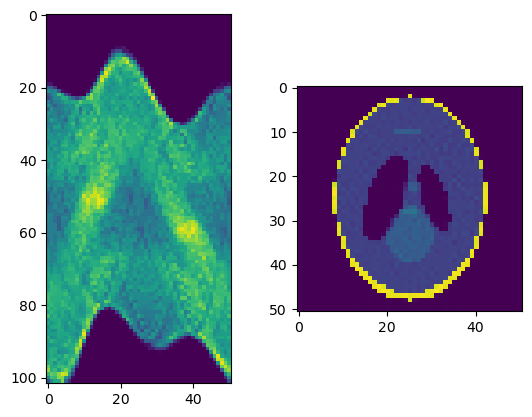

In [6]:
#Reconstruction by Kaczmarz/ART
fK = Xobj.ART(g,sweeps =4)


#Visualisation of the data
fig, (ax1, ax2) = plt.subplots(1, 2, num=3)
ax1.imshow(g)
ax2.imshow(fK)
plt.show()